In [1]:
# Import the packages we will use
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import h5py

import cooler

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# The following directive activates inline plotting
%matplotlib inline

In [3]:
# Download a multiresoltion Dictyostelium file
!wget -nc http://makarich.fbb.msu.ru/agalicina/Lab_open/DICTY/COOL/Dicty_5A.1000.cool.multires

File ‘Dicty_5A.1000.cool.multires’ already there; not retrieving.



In [4]:
h5 = h5py.File('Dicty_2A.1000.cool.multires', 'r')

In [5]:
list(h5.keys())

['resolutions']

In [6]:
list(h5['resolutions'])

['1000',
 '10000',
 '100000',
 '1000000',
 '2000',
 '20000',
 '3000',
 '30000',
 '4000',
 '5000',
 '50000']

In [7]:
list(h5['resolutions']['1000'].keys())

['bins', 'chroms', 'indexes', 'pixels']

### Parsing with cooler

In [8]:
# Information about loops is with the resolution 2000
resolution = '2000'

In [9]:
filepath = 'Dicty_0A.1000.cool.multires::resolutions/' + resolution

In [10]:
c = cooler.Cooler(filepath)

In [11]:
c.info

{'bin-size': 2000,
 'bin-type': 'fixed',
 'creation-date': '2018-12-02T00:56:59.862527',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 2,
 'generated-by': 'cooler-0.7.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 16975,
 'nchroms': 6,
 'nnz': 8825714,
 'sum': 21807437}

### Bins visualization

In [12]:
# 1 or 6 to assign chr
chr_num = 6
chr = 'chr' + str(chr_num)

In [13]:
bins = c.bins()[:]
bins_num = bins[bins.chrom == chr].shape[0]
indx = bins[bins.chrom == chr].index.values
start = indx[0]
end = indx[-1]
mat = c.matrix(balance=True, sparse=True)[start:end, start:end]
arr = mat.toarray()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


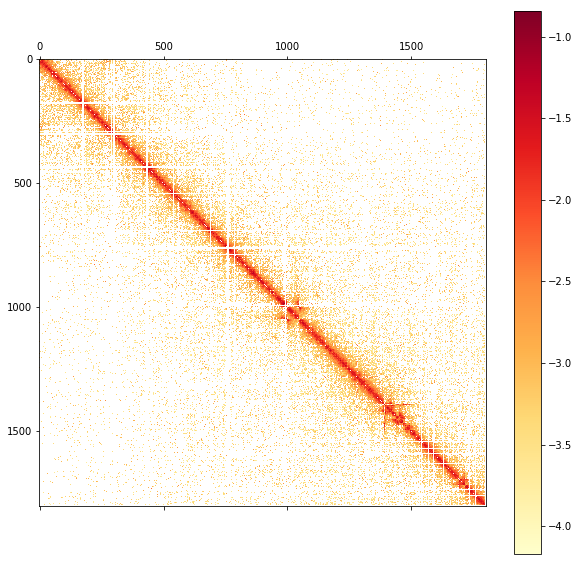

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr), cmap='YlOrRd')
fig.colorbar(im)

### Read loops info

In [15]:
loops_info = pandas.read_excel('dicty_loop_positions_Chr1_Chr6.xlsx')
loops_positions = loops_info[loops_info.Chr == chr_num]

In [16]:
loops_positions[:8]

,Chr,ID,"Genomic bin, Left base","Genomic bin, Right base",Size (Kb),"""Extrusion track""","Note for extrusion tracks: 0=n/a, 1=from the left base, 2=from the right base"
148,6,149,6,15,20,0,NaN
149,6,150,15,25,22,0,NaN
150,6,151,25,35,22,2,NaN
151,6,152,35,46,24,2,NaN
152,6,153,46,51,12,2,NaN
153,6,154,52,60,18,1,NaN
154,6,155,66,73,16,0,NaN
155,6,156,73,79,14,2,NaN


### Visualize loops on plots

In [17]:
loops_x = loops_positions['Genomic bin, Left base'].values
loops_y = loops_positions['Genomic bin, Right base'].values
loops_type = loops_positions['"Extrusion track"'].values
loops_size = loops_positions['Size (Kb)'].values

In [18]:
edgecolors = []
for l in loops_type:
    if l == 0:
        edgecolors.append('blue')
    elif l == 1:
        edgecolors.append('lime')
    else:
        edgecolors.append('cyan')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


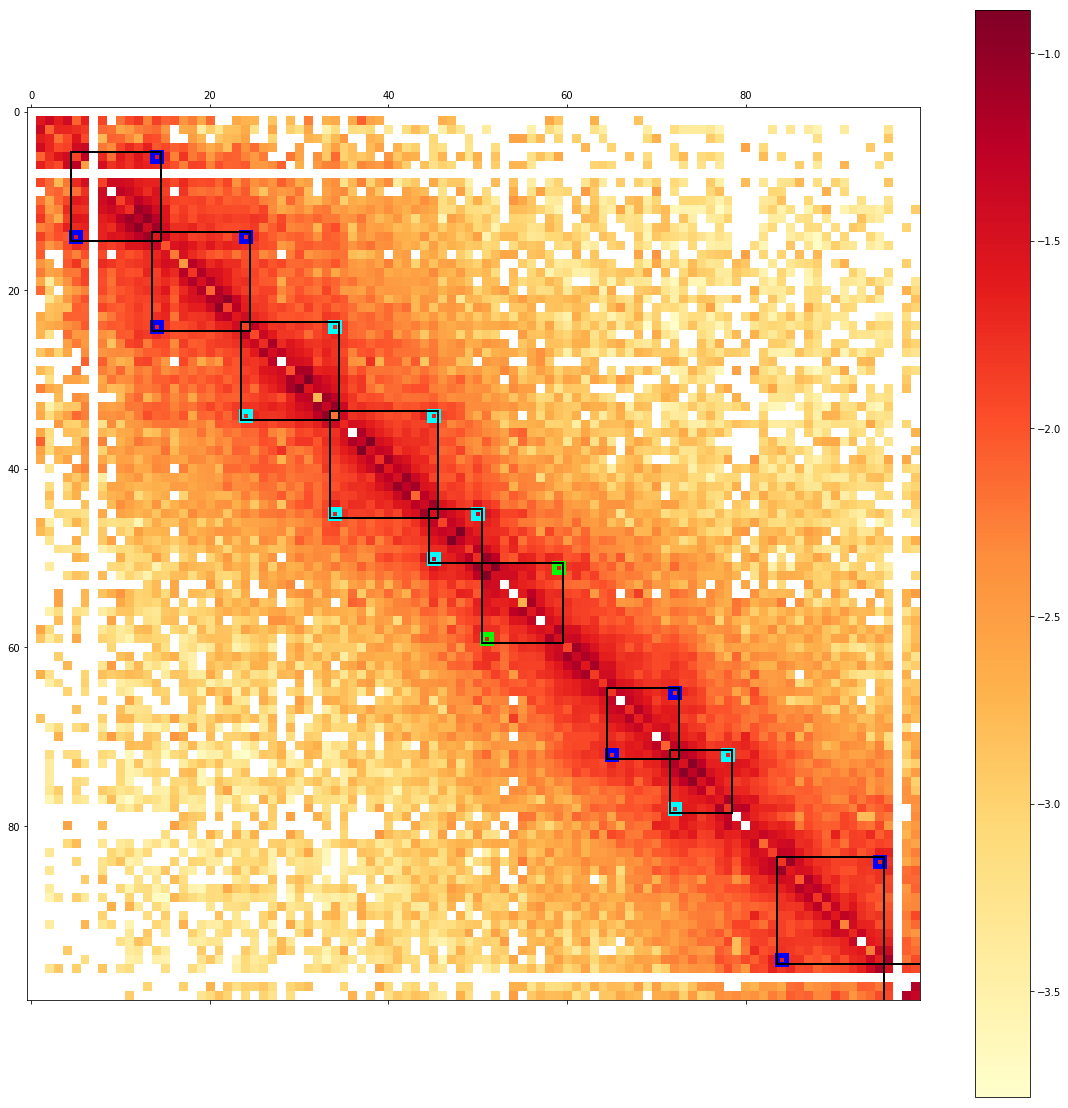

In [28]:
start_bin = 0
end_bin = start_bin + 100

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr[start_bin:end_bin, start_bin:end_bin]), cmap='YlOrRd')
fig.colorbar(im)

for idx, x in enumerate(loops_x):
    loop = matplotlib.patches.Rectangle((loops_y[idx]-1.5-start_bin, x-1.5-start_bin), 1, 1,
                                        fill=None, alpha=1, edgecolor=edgecolors[idx], linewidth=5.0)
    ax.add_patch(loop)
    loop = matplotlib.patches.Rectangle((x-1.5-start_bin, loops_y[idx]-1.5-start_bin), 1, 1,
                                        fill=None, alpha=1, edgecolor=edgecolors[idx], linewidth=5.0)
    ax.add_patch(loop)
    loop_tr = matplotlib.patches.Rectangle((loops_y[idx]-0.5-loops_size[idx]/2-start_bin, x-1.5-start_bin),
                                           loops_size[idx]/2, loops_size[idx]/2, fill=None, alpha=1, edgecolor='black',
                                          linewidth=2.0)
    ax.add_patch(loop_tr)